### Google Play Store Apps
##### Data: Web scraped data of 10k Play Store apps for analysing the Android market.
This exercise is for data exploration and cleaning and machine learning predictions.

##### Import Modules


In [399]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [458]:
os.chdir('/Users/Hung/Documents/k_data')
store = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

store.columns
store.describe()
store.info()

store.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [401]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [402]:
store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [403]:
store.columns = store.columns.str.replace(' ','_')

In [404]:
print('The shape of the data is:' ,store.shape)
print('The data type is:', store.dtypes)

The shape of the data is: (9360, 13)
The data type is: App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object


#### Size

In [405]:
store.Size.value_counts(sort=True, ascending=False).head()

Varies with device    1637
14M                    165
12M                    161
11M                    159
15M                    159
Name: Size, dtype: int64

In [406]:
store.Size=store.Size.str.replace('k','e+3')
store.Size=store.Size.str.replace('M','e+6')
store.Size.head()

0     19e+6
1     14e+6
2    8.7e+6
3     25e+6
4    2.8e+6
Name: Size, dtype: object

In [407]:
def is_convertible(v):
    try:
        float(v)
        return True
    except ValueError:
        return False
    
t=store.Size.apply(lambda x: is_convertible(x))
t.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [408]:
store.Size[~t].value_counts()

Varies with device    1637
Name: Size, dtype: int64

In [409]:
## replace Varies with device by nans
store.Size = store.Size.replace('Varies with device', np.nan)

In [410]:
## convert the clean data to numeric data
store.Size = pd.to_numeric(store.Size)

In [411]:
store.Size.head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

Text(0, 0.5, 'Frequency')

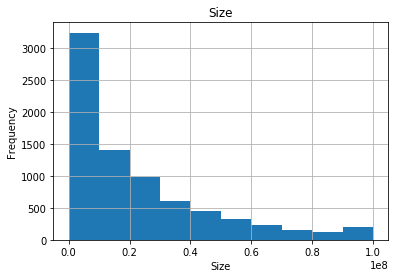

In [412]:
store.hist(column = 'Size')
plt.xlabel('Size')
plt.ylabel('Frequency')

#### Install

In [413]:
store.Installs.value_counts(sort = True, ascending = False)

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [414]:
store.Installs = store.Installs.apply(lambda x: x.strip('+'))
store.Installs = store.Installs.apply(lambda x: x.replace(',',''))
store.Installs = store.Installs.replace('Free',np.nan)
store.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [415]:
store.Installs.str.isnumeric().sum()

9360

In [416]:
store.Installs = pd.to_numeric(store.Installs)

Text(0, 0.5, 'Frequency')

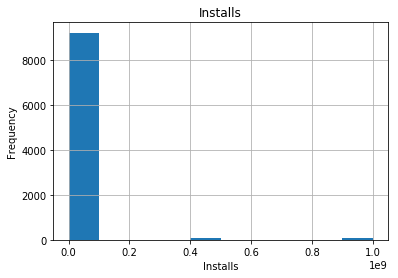

In [417]:
store.hist(column = 'Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')

Reviews

In [418]:
store.Reviews.str.isnumeric().sum()
store.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
7          62
6          62
8          57
12         53
10         46
9          39
11         39
13         37
17         36
19         33
16         31
14         30
21         29
20         28
25         27
15         26
18         25
33         24
38         23
27         23
22         23
30         22
28         22
24         21
23         20
           ..
15545       1
1432447     1
1699        1
24226       1
107497      1
950         1
4075        1
376         1
4928420     1
37000       1
40770       1
5282558     1
20977       1
7793        1
3648765     1
24775       1
1172        1
283823      1
1739        1
35563       1
2750645     1
17415       1
13388       1
85079       1
22165       1
5395        1
3677        1
5091448     1
3446        1
567632      1
Name: Reviews, Length: 5990, dtype: int64

In [419]:
store['logreviews'] = pd.Series(np.log(store.Reviews), index=store.index)
store.head()

AttributeError: 'str' object has no attribute 'log'

Text(0, 0.5, 'Frequency')

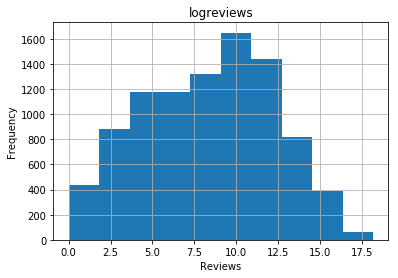

In [420]:
store.Reviews = pd.to_numeric(store.Reviews)
store['logreviews'] = pd.Series(np.log(store.Reviews), index=store.index)
store.head()
store.hist(column = 'logreviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')

#### Rating

In [421]:
print('Range of rating is:', store.Rating.min(), '-', store.Rating.max())

Range of rating is: 1.0 - 5.0


In [422]:
store.Rating.dtype

dtype('float64')

In [423]:
print('The number of null value is:', store.Rating.isna().sum())

The number of null value is: 0


Text(0, 0.5, 'Frequency')

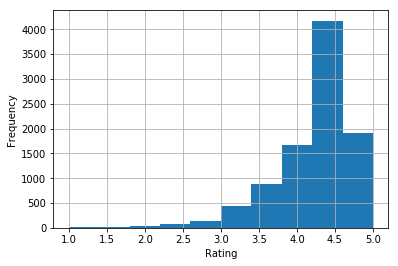

In [424]:
store.Rating.hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')

#### Type

In [425]:
store.Type.value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

#### Price

In [426]:
store.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [427]:
store.Price = store.Price.str.strip('$')

In [428]:
#store.Price.unique()

Text(0, 0.5, 'Frequency')

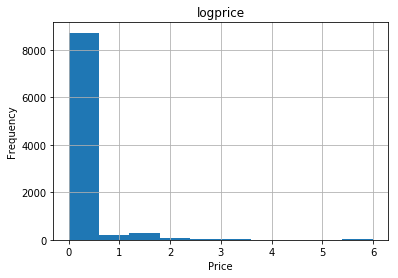

In [429]:
store.Price = pd.to_numeric(store.Price)
## take the log transformation of the price
store['logprice'] = pd.Series(np.log(store.Price + 1),index=store.index )
store.hist(column = 'logprice')
plt.xlabel('Price')
plt.ylabel('Frequency')

From the price, we can see that there are prices like 399.99 and 400. So I go back and check the app to see if there is problem.

In [430]:
price = store.Price.apply(lambda x: True if x > 350 else False)
store[price]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,logreviews,logprice
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,1.791759,5.993936
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,6.576470,5.993936
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,5.616771,5.993961
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,8.173857,5.993936
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,6.752270,5.993936
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,7.532088,5.993936
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900000.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,3.713572,5.942773
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,4.532599,5.993936
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,6.156979,5.993936
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,5.303305,5.993936


#### Category

In [431]:
store.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

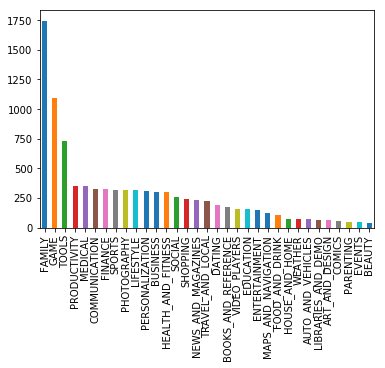

In [432]:
store.Category.value_counts().plot(kind = 'bar')

#### Content rating

In [433]:
store.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [434]:
store.Content_Rating.value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

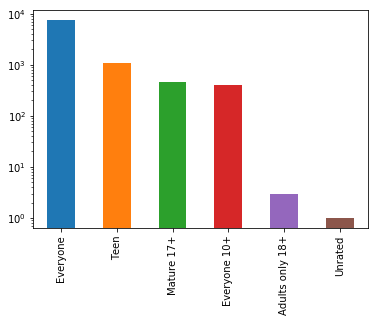

In [435]:
store.Content_Rating.value_counts().plot(kind = 'bar')
plt.yscale('log')

#### Genres

In [436]:
store.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [437]:
## The data is in the format of category and subcategory 
## Separate them into two columns
sep = ';'
rest = store.Genres.apply(lambda x: x.split(sep)[0])
store['Primary_Genres']=rest
store.Primary_Genres.head()

0    Art & Design
1    Art & Design
2    Art & Design
3    Art & Design
4    Art & Design
Name: Primary_Genres, dtype: object

In [438]:
sub = store.Genres.apply(lambda x: x.split(sep)[-1])
store['Secondary_Genres'] = sub
store.Secondary_Genres.head()

0    Art & Design
1    Pretend Play
2    Art & Design
3    Art & Design
4      Creativity
Name: Secondary_Genres, dtype: object

In [439]:
grouped = store.groupby(['Primary_Genres','Secondary_Genres'])
grouped.size().head()

Primary_Genres  Secondary_Genres  
Action          Action                358
                Action & Adventure     17
Adventure       Action & Adventure     13
                Adventure              73
                Brain Games             1
dtype: int64

In [440]:
twoway = pd.crosstab(index = store['Primary_Genres'], columns = store['Secondary_Genres'])
twoway.head()

Secondary_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Primary_Genres,,,,,,,,,,,,,,,,,,,,,
Action,358,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,13,73,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,15,0,207,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,0,0,0,55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,73,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


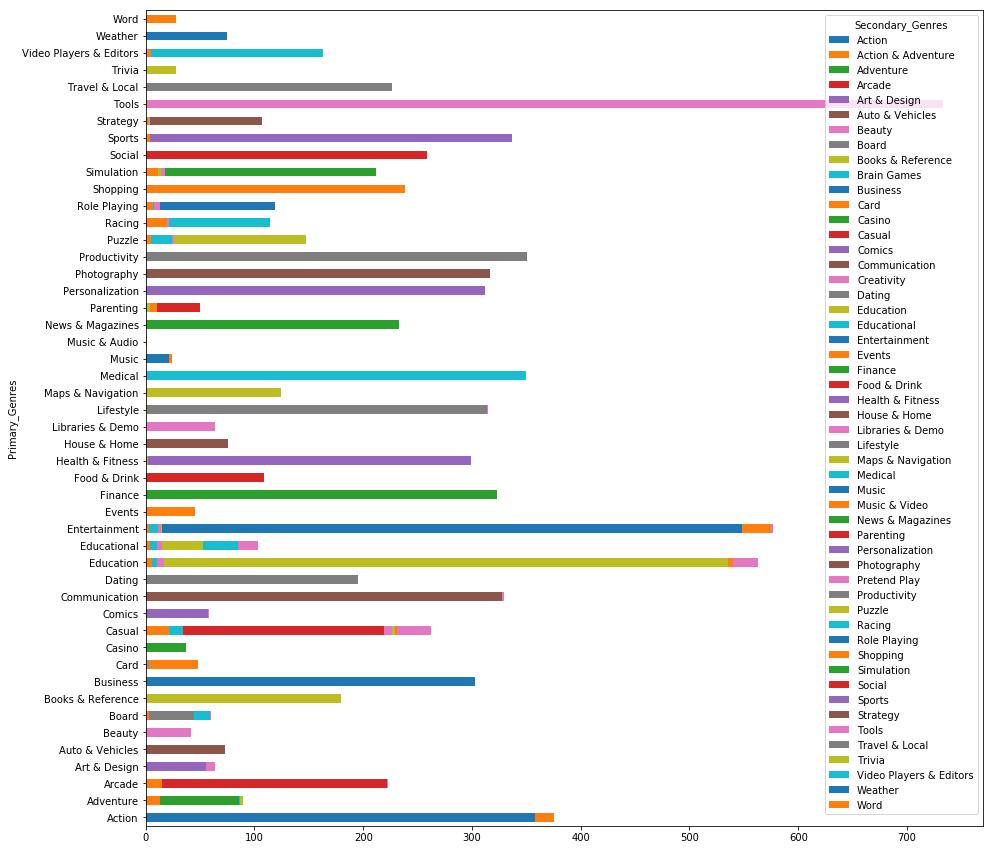

In [441]:
twoway.plot(kind = 'barh',figsize = (15,15), stacked = True)

#### Lastupdated

In [442]:
store.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [443]:
from datetime import datetime, date
t = pd.to_datetime(store.Last_Updated)
t.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

In [444]:
date.today()

datetime.date(2019, 7, 5)

In [445]:
store['lastupdated_day'] = t.apply(lambda x: date.today() - datetime.date(x))
store.lastupdated_day.head()

0   544 days
1   536 days
2   338 days
3   392 days
4   380 days
Name: lastupdated_day, dtype: timedelta64[ns]

#### Android Version

In [446]:
store.Android_Ver.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [447]:
## Most of them has a upper and lower level, we can divide them into two columns

In [448]:
store['Version_begin'] = store.Android_Ver.apply(lambda x: str(x).split(' and ')[0].split(' - ')[0])
store['Version_begin'] = store.Version_begin.replace('4.4W','4.4')
store['Version_end'] = store.Android_Ver.apply(lambda x: str(x).split(' and ')[-1].split(' - ')[-1])

In [449]:
store.Version_begin.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '4.3', '2.0', '3.2', '5.1', '7.1', '8.0', '3.1', '2.0.1',
       '1.0'], dtype=object)

In [450]:
store.Version_end.unique()

array(['up', 'Varies with device', '7.1.1', '8.0', '6.0'], dtype=object)

In [451]:
twoway = pd.crosstab(index = store.Version_begin, columns = store.Version_end)
twoway.head()

Version_end,6.0,7.1.1,8.0,Varies with device,up
Version_begin,,,,,
1.0,0,0,0,0,2
1.5,0,0,0,0,15
1.6,0,0,0,0,87
2.0,0,0,0,0,27
2.0.1,0,0,0,0,7


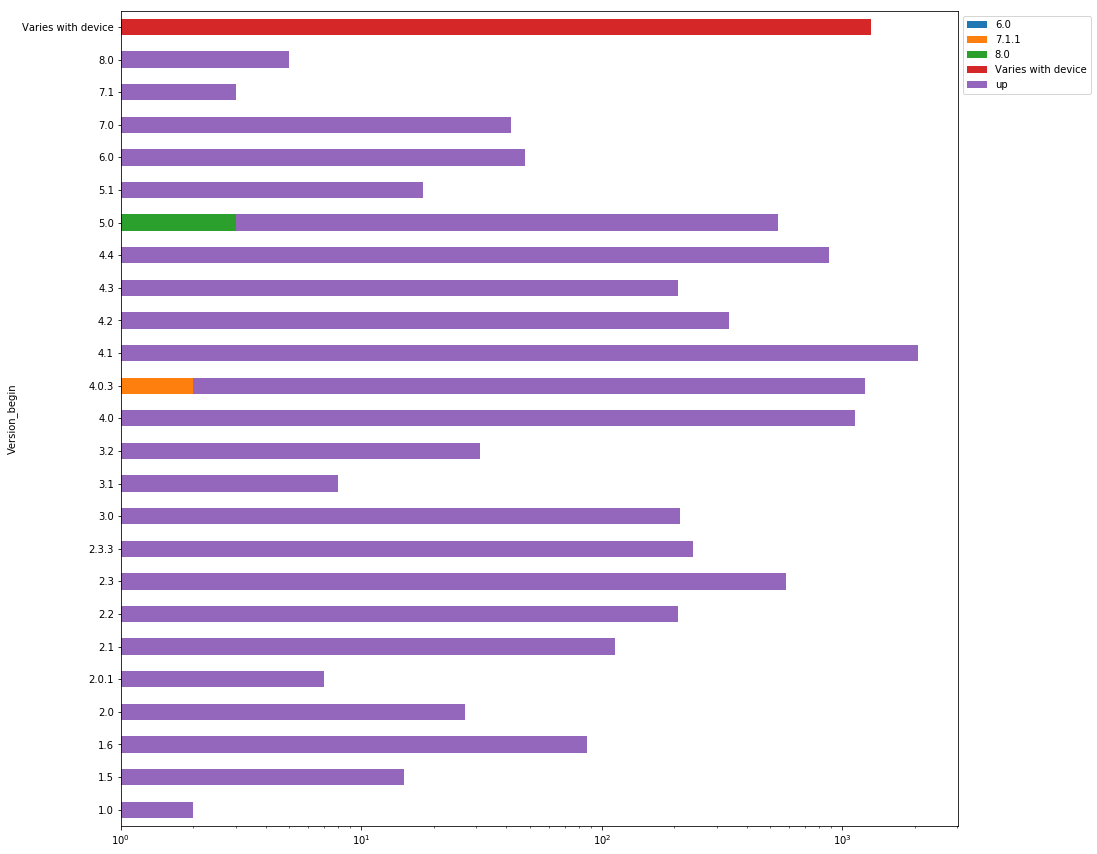

In [452]:
twoway.plot(kind = 'barh', figsize = (15,15), stacked = True)
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xscale('log')

Cleaning categories into integers

In [453]:
CategoryString = store["Category"]
categoryVal = store["Category"].unique()
categoryVal

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [459]:
categoryValCount = len(categoryVal)
category_dict = {} 
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
store["Category_c"] = store["Category"].map(category_dict).astype(int)
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32}

In [460]:
### change size
def changesize(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*10000000
        return x
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x) * 1000
        return x
    else:
        return None
store['Size'] = store['Size'].map(changesize)
    

In [461]:
store.Size.head()

0    190000000.0
1    140000000.0
2     87000000.0
3    250000000.0
4     28000000.0
Name: Size, dtype: float64

In [462]:
store.Size.fillna(method = 'ffill', inplace = True)

In [463]:
store.Size.isna().sum()

0

In [464]:
## clear the installs columns with list comprehension
store['Installs'] = [ int(i[:-1].replace(',','')) for i in store['Installs']]

In [465]:
store.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [466]:
def category_type(type):
    if type == 'free':
        return 0
    else:
        return 1
store['Type'] = store['Type'].map(category_type)

In [467]:
store.Type.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [468]:
store.columns = store.columns.str.replace(' ','_')
RatingL = store['Content_Rating'].unique()

In [469]:
ratingdict = {}
for i in range(len(RatingL)):
    ratingdict[RatingL[i]] = i
store['Content_Rating'] = store.Content_Rating.map(ratingdict).astype(int)

In [470]:
store.drop(labels = ['Last_Updated','Current_Ver','Android_Ver','App'], axis = 1, inplace = True)

In [471]:
store.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_c
0,ART_AND_DESIGN,4.1,159,190000000.0,10000,1,0,0,Art & Design,0
1,ART_AND_DESIGN,3.9,967,140000000.0,500000,1,0,0,Art & Design;Pretend Play,0
2,ART_AND_DESIGN,4.7,87510,87000000.0,5000000,1,0,0,Art & Design,0
3,ART_AND_DESIGN,4.5,215644,250000000.0,50000000,1,0,1,Art & Design,0
4,ART_AND_DESIGN,4.3,967,28000000.0,100000,1,0,0,Art & Design;Creativity,0


In [472]:
genrel = store.Genres.unique()
genredict = {}
for i in range(len(genrel)):
    genredict[genrel[i]] = i
store['genre_c'] = store['Genres'].map(genredict).astype(int)

    

In [473]:
def clean_price(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price
store['Price'] = store['Price'].map(clean_price).astype(float)


In [359]:
store['Reviews'] = store['Reviews'].astype(int)

In [360]:
store.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_c,Content_Rating_c,genre_c,price_clean,price
0,ART_AND_DESIGN,4.1,159,190000000.0,10000,1,0.0,0,Art & Design,0,0,0,0.0,0.0
1,ART_AND_DESIGN,3.9,967,140000000.0,500000,1,0.0,0,Art & Design;Pretend Play,0,0,1,0.0,0.0
2,ART_AND_DESIGN,4.7,87510,87000000.0,5000000,1,0.0,0,Art & Design,0,0,0,0.0,0.0
3,ART_AND_DESIGN,4.5,215644,250000000.0,50000000,1,0.0,1,Art & Design,0,1,0,0.0,0.0
4,ART_AND_DESIGN,4.3,967,28000000.0,100000,1,0.0,0,Art & Design;Creativity,0,0,2,0.0,0.0


In [361]:
## create another dataframe for dummy variables
df2 = pd.get_dummies(store, columns = ['Category'])
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Category_c,Content_Rating_c,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,190000000.0,10000,1,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,140000000.0,500000,1,0.0,0,Art & Design;Pretend Play,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,87000000.0,5000000,1,0.0,0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,250000000.0,50000000,1,0.0,1,Art & Design,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,28000000.0,100000,1,0.0,0,Art & Design;Creativity,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Linear Regression


In [379]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [372]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_true,y_predict)))

In [373]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['Mean Squared Log Error'] = metrics.mean_squared_log_error(y_true,y_predict)
    return dict_matrix

In [374]:
X.head()

,Reviews,Size,Installs,Type,Price,Content_Rating,Category_c,Content_Rating_c,price_clean,price
0,159,190000000.0,10000,1,0.0,0,0,0,0.0,0.0
1,967,140000000.0,500000,1,0.0,0,0,0,0.0,0.0
2,87510,87000000.0,5000000,1,0.0,0,0,0,0.0,0.0
3,215644,250000000.0,50000000,1,0.0,1,0,1,0.0,0.0
4,967,28000000.0,100000,1,0.0,0,0,0,0.0,0.0


In [375]:
X = store.drop(labels = ['Category','Rating','Genres','genre_c'],axis = 1)
y = store.Rating
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
model= LinearRegression()
model.fit(X_train,y_train)
result = model.predict(X_test)

resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,result),orient = 'index')
resultsdf = resultsdf.transpose()

In [377]:
#dummy encoding
X_d = df2.drop(labels = ['Rating','Genres','Category_c','genre_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)
model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

#adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - Dummy'),ignore_index = True)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


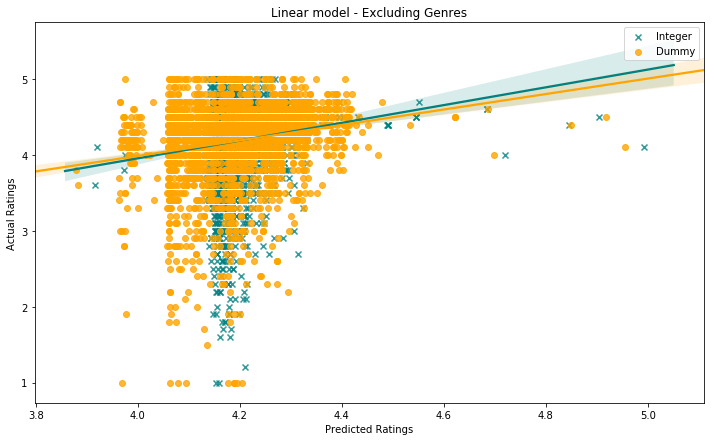

In [382]:
plt.figure(figsize=(12,7))
sns.regplot(result,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

#### svm model

In [383]:
from sklearn import svm

In [389]:
X = store.drop(labels = ['Category','Rating','Genres','genre_c'],axis = 1)
y = store.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'SVM - Integer'),ignore_index = True)

#dummy based


X_d = df2.drop(labels = ['Rating','Genres','Category_c','genre_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

model2 = svm.SVR()
model2.fit(X_train_d,y_train_d)

Results2_d = model2.predict(X_test_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results2_d, name = 'SVM - Dummy'),ignore_index = True)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


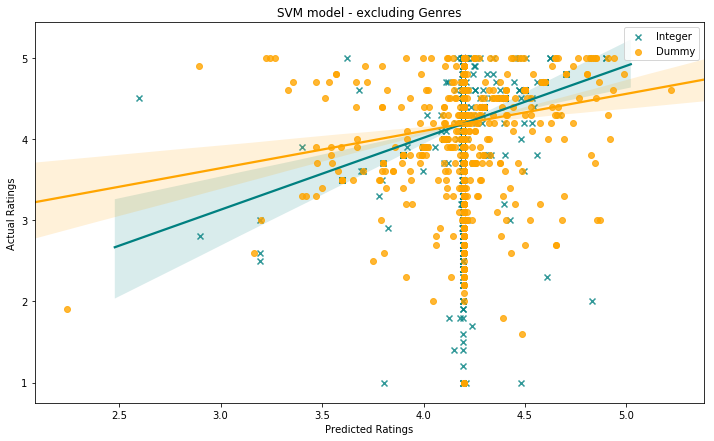

In [390]:
plt.figure(figsize=(12,7))
sns.regplot(Results2,y_test,color='teal', label = 'Integer', marker = 'x')
sns.regplot(Results2_d,y_test_d,color='orange',label = 'Dummy')
plt.legend()
plt.title('SVM model - excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()